Diwali Sales Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

df = pd.read_csv(r"C:\Users\Ankit Rai\OneDrive\Documents\datasets for practice\Diwali Sales Data.csv", encoding ='Latin 1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [39]:
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

Exploratory Data Analysis

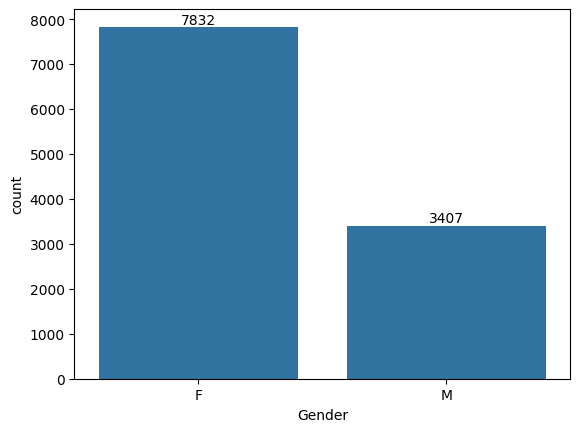

In [10]:
ax = sns.countplot( data=df, x='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

Maximum buyers are female 

<Axes: xlabel='Gender', ylabel='Amount'>

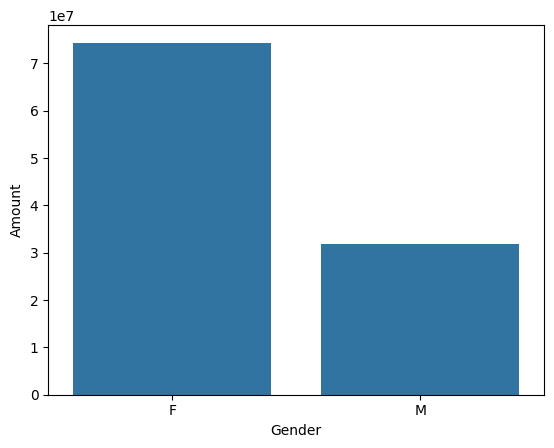

In [12]:
sales_gender = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.barplot(data=sales_gender,x='Gender',y='Amount')


Large number of buyers were female and their purchasing power is also greater than the males

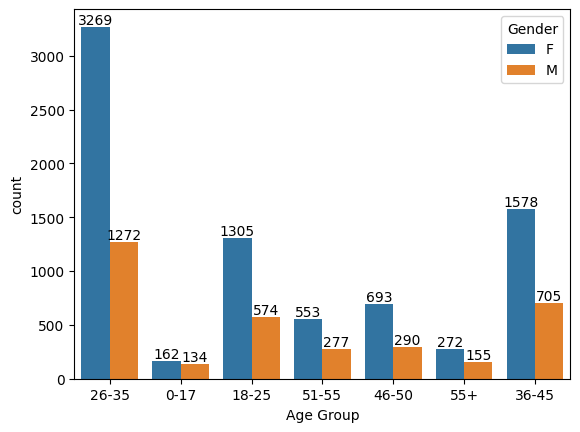

In [13]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

Maximum buyers were from the age group 26-35 and majorly Females

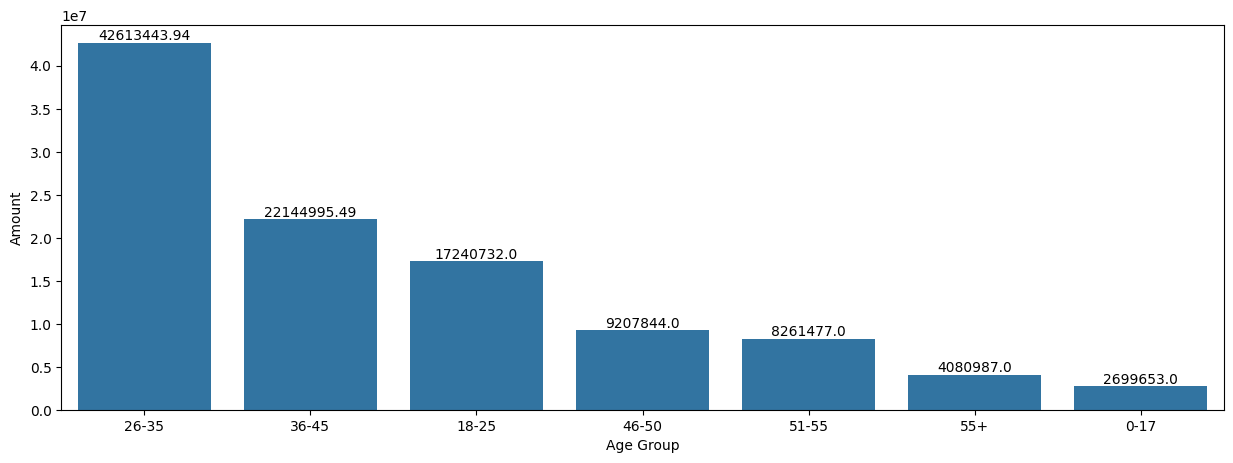

In [68]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_age,x='Age Group',y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()),ha = 'center', va='bottom')

Purchasing Power of age group 26-35 is greater as compared to other age groups

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

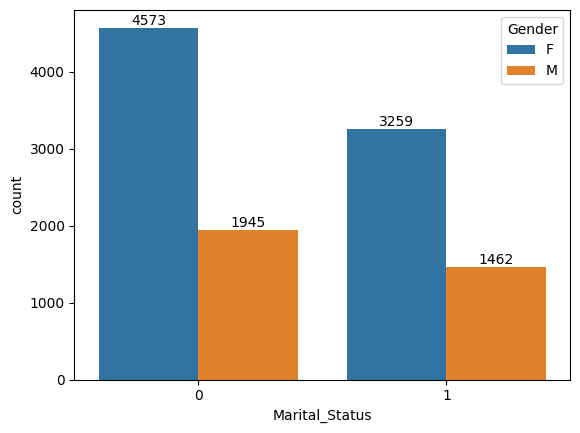

In [22]:
ax= sns.countplot(data=df ,x='Marital_Status',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

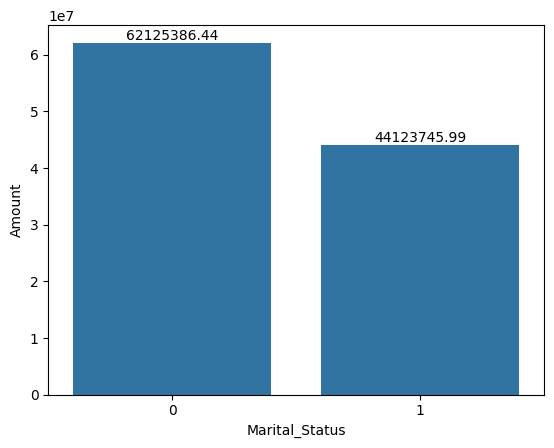

In [70]:
sales_marital=df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax =sns.barplot(data=sales_marital,x='Marital_Status',y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()), ha='center',va='bottom')

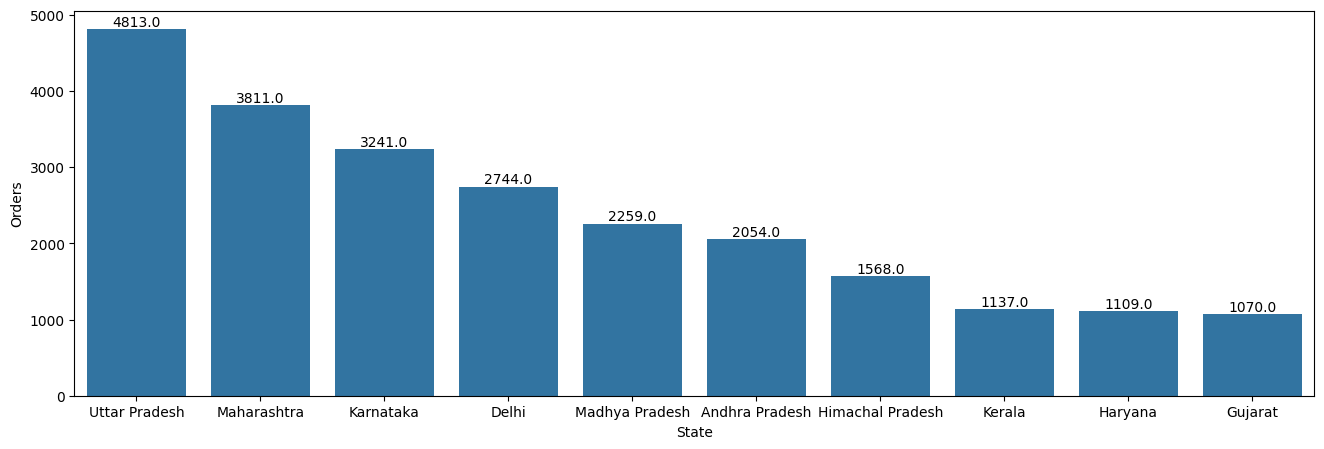

In [23]:
order_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=order_state,x='State', y='Orders')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')


Top 3 States placing the most orders are Uttar Pradesh ,Maharashtra and Karnataka

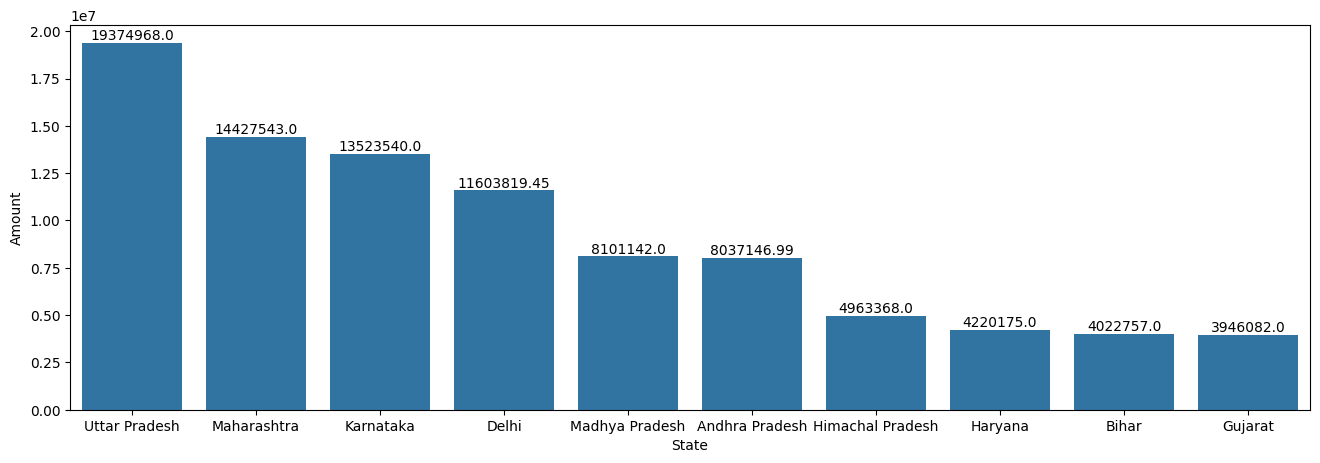

In [22]:
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by ='Amount',ascending=False).head(10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=sales_state,x='State',y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

Top 3 states contributing maximum revenue to the company are Uttar Pradesh, Maharashtra and Karnataka

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

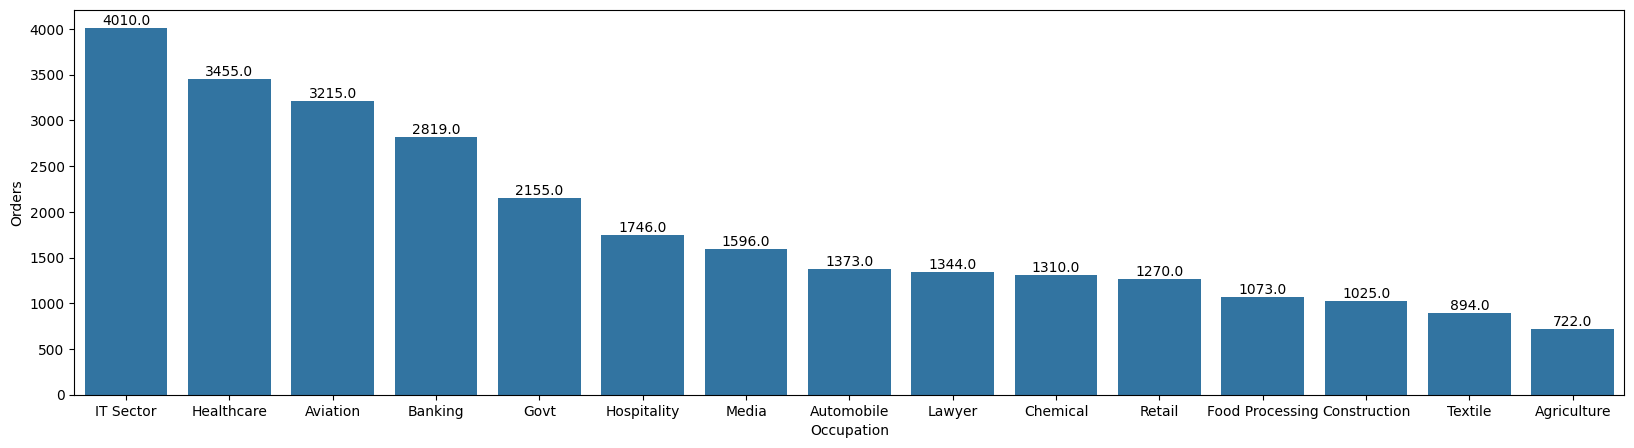

In [43]:
order_occupation = df.groupby(['Occupation'],as_index=False)['Orders'].sum().sort_values(by = 'Orders',ascending=False)
plt.figure(figsize=(20,5))
ax= sns.barplot(data=order_occupation,x='Occupation',y='Orders')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()), ha='center',va='bottom')
   

IT sector's contribution is maximum in placing the order

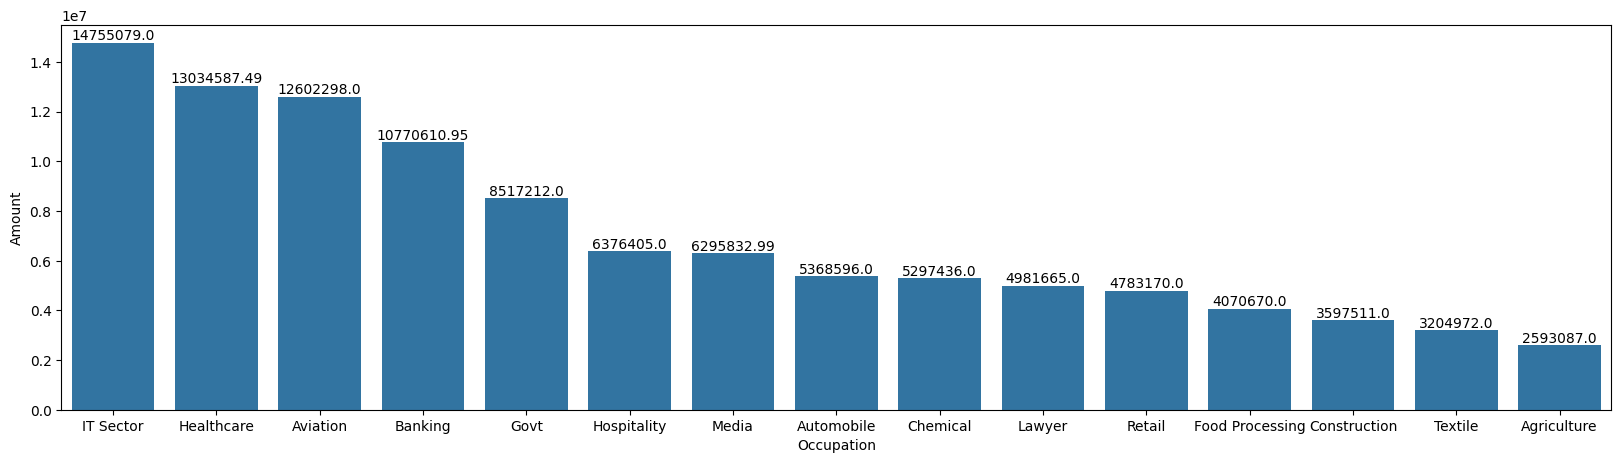

In [46]:
sales_Occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=sales_Occupation,x='Occupation',y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()), ha='center',va='bottom')

As the IT Sector's contribution is maximum in placing orders as well as their purchasing power.

In [50]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

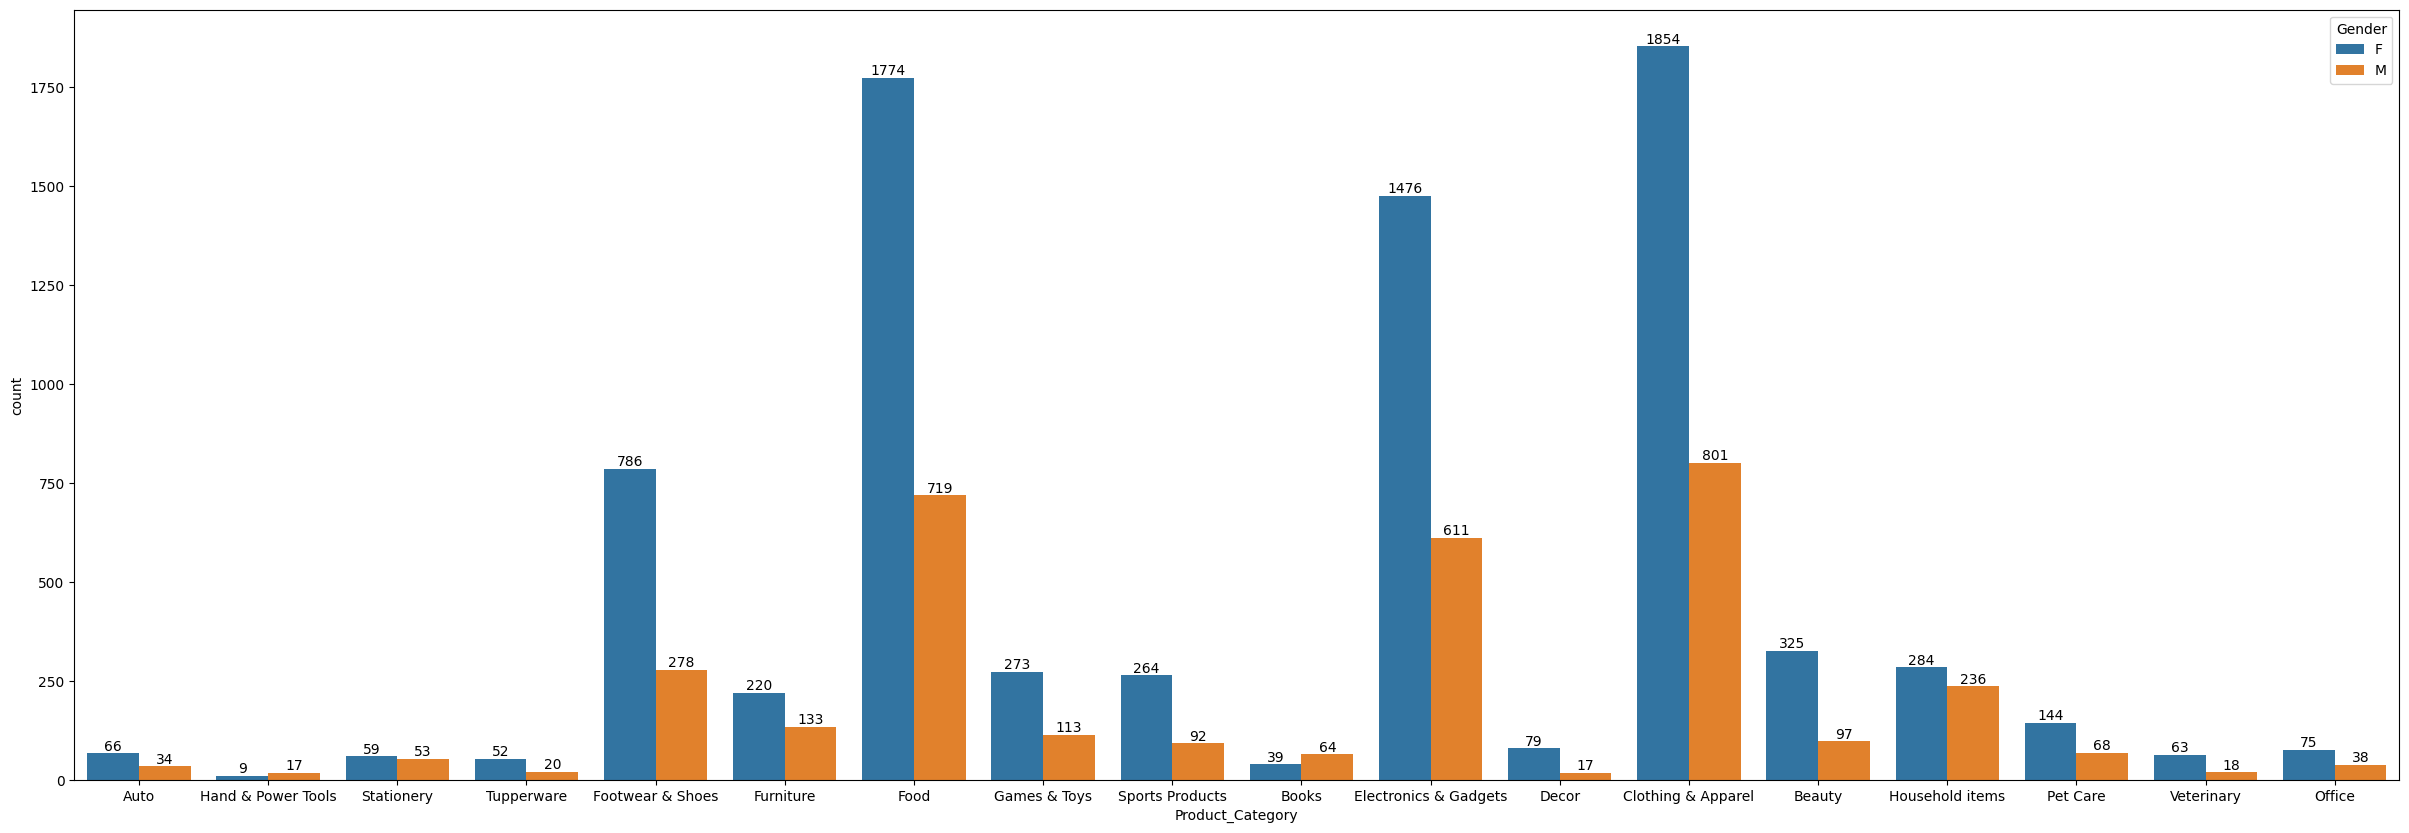

In [63]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data=df, x='Product_Category',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)



Most of the orders are from Clothing & Apparel ,Food and Electronic Gadgets.

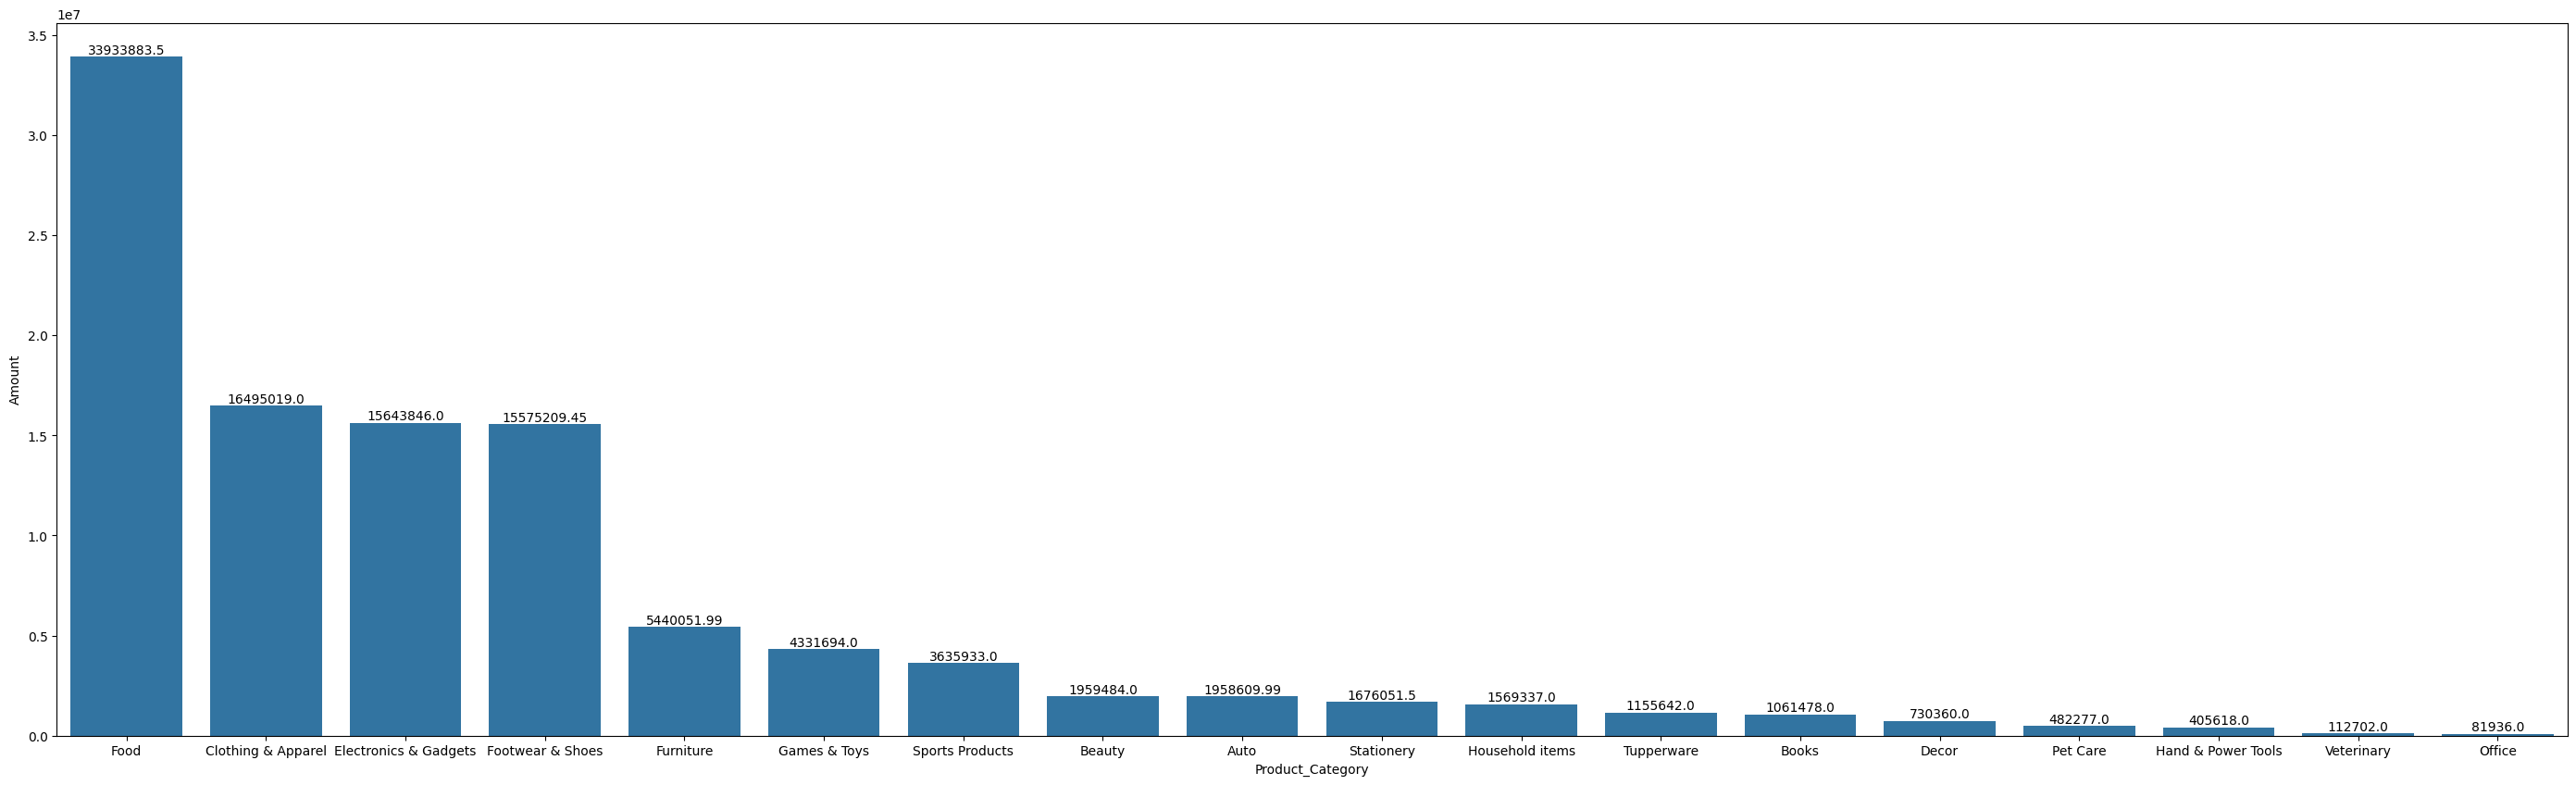

In [72]:
sales_product = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(35,10))
ax = sns.barplot(data=sales_product,x='Product_Category', y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='bottom')

Revenue generation is maximum in Food category instead of having maximum orders from Clothing & Apparel Category

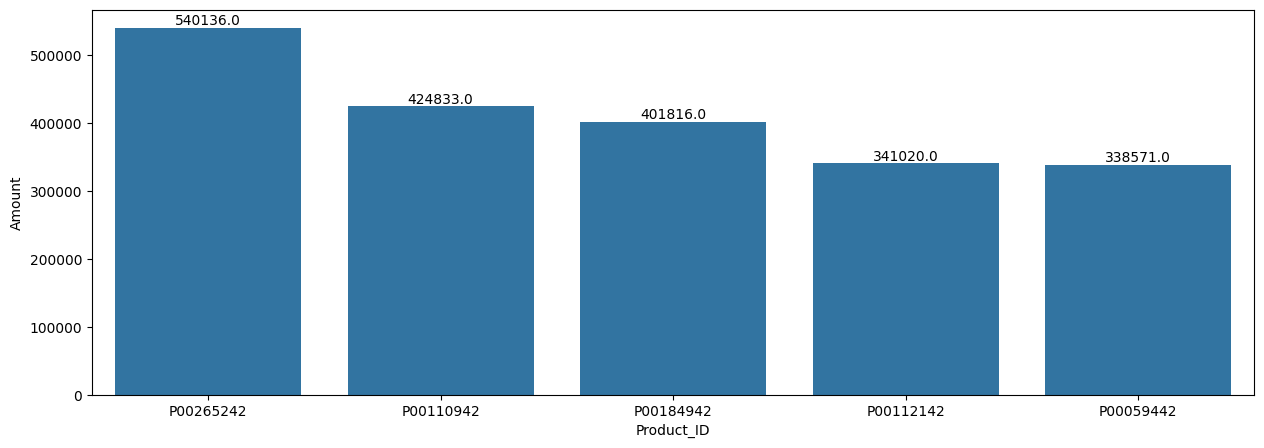

In [77]:
# Top 5 Product ID contributing to the maximum revenue Generation
sales_id = df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by ='Amount',ascending=False).head(5)
plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_id,x='Product_ID',y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='bottom')

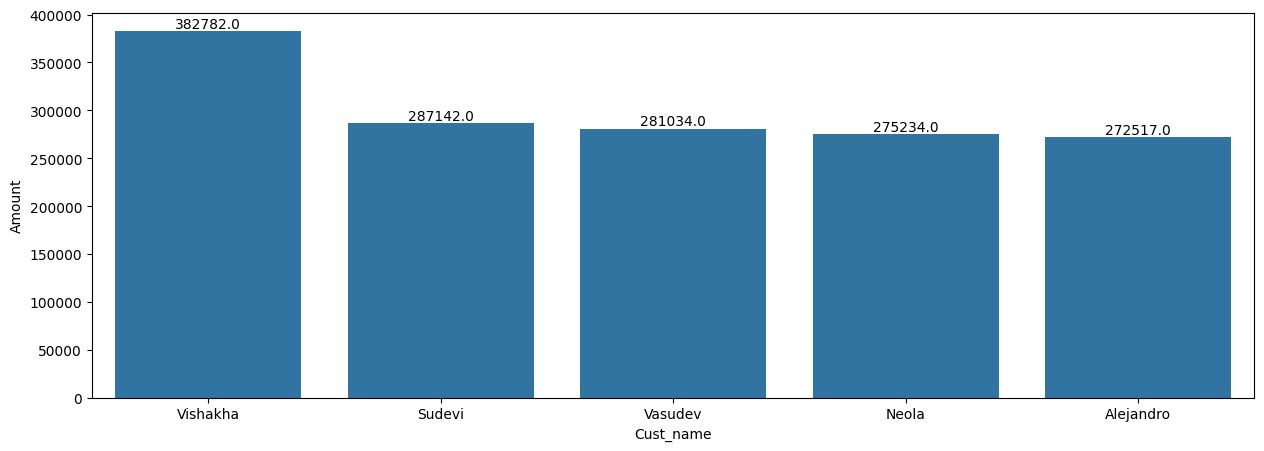

In [81]:
# Top 5 Customer name generating maximum revenue for the company
name_id = df.groupby(['Cust_name'],as_index=False)['Amount'].sum().sort_values(by ='Amount',ascending=False).head(5)
plt.figure(figsize=(15,5))
ax=sns.barplot(data=name_id,x='Cust_name',y='Amount')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='bottom')